# Домашняя работа 1. Иерархический кластерный анализ.

Вариант 2. Economics of Cities

In [210]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [12, 12]

import os

In [211]:
# Загружаем данные
data = pd.read_csv("Economics of Cities/Econom_Cities_data.csv", decimal=",", delimiter=";", index_col='City')
len(data)

48

Проверяем правильность данных

In [212]:
data

,Work,Price,Salary
City,,,
Amsterdam,1714,65.6,49.0
Athens,1792,53.8,30.4
Bogota,2152,37.9,11.5
Bombay,2052,30.3,5.3
Brussels,1708,73.8,50.5
Buenos_Aires,1971,56.1,12.5
Cairo,-9999,37.1,-9999.0
Caracas,2041,61.0,10.9
Chicago,1924,73.9,61.9


In [213]:
data.dtypes

Work        int64
Price     float64
Salary    float64
dtype: object

Видим что есть два города для которых неизвестно значение работы и заработной платы. Удалим их как выбросы.

In [214]:
X = data.where(data.values != -9999).dropna()
X

,Work,Price,Salary
City,,,
Amsterdam,1714.0,65.6,49.0
Athens,1792.0,53.8,30.4
Bogota,2152.0,37.9,11.5
Bombay,2052.0,30.3,5.3
Brussels,1708.0,73.8,50.5
Buenos_Aires,1971.0,56.1,12.5
Caracas,2041.0,61.0,10.9
Chicago,1924.0,73.9,61.9
Copenhagen,1717.0,91.3,62.9


Видим что в первом столбце у нас даны часы, а во втором и третьем стобце проценты, причём для Цюриха значение взято за 100%. Стандартизуем первый столбец, так чтобы для Цюриха было тоже 100%.

In [215]:
X["Work"] = X["Work"] / X["Work"]["Zurich"] * 100
X

,Work,Price,Salary
City,,,
Amsterdam,91.755889,65.6,49.0
Athens,95.931478,53.8,30.4
Bogota,115.203426,37.9,11.5
Bombay,109.850107,30.3,5.3
Brussels,91.434690,73.8,50.5
Buenos_Aires,105.513919,56.1,12.5
Caracas,109.261242,61.0,10.9
Chicago,102.997859,73.9,61.9
Copenhagen,91.916488,91.3,62.9


Проведём иерархический кластерный анализ

In [217]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

link = linkage(X, 'ward', 'euclidean')
link

array([[ 20.        ,  33.        ,   2.64394106,   2.        ],
       [  4.        ,  39.        ,   4.01811946,   2.        ],
       [ 26.        ,  44.        ,   4.48780841,   2.        ],
       [ 27.        ,  43.        ,   4.53030364,   2.        ],
       [ 10.        ,  11.        ,   4.61940135,   2.        ],
       [ 25.        ,  28.        ,   4.8591869 ,   2.        ],
       [ 13.        ,  31.        ,   5.6781249 ,   2.        ],
       [  1.        ,  36.        ,   5.71878538,   2.        ],
       [  2.        ,  17.        ,   5.87918409,   2.        ],
       [  6.        ,  37.        ,   6.21312046,   2.        ],
       [ 34.        ,  35.        ,   6.31906423,   2.        ],
       [  7.        ,  49.        ,   7.33014735,   3.        ],
       [ 21.        ,  29.        ,   7.62282627,   2.        ],
       [  0.        ,  47.        ,   8.33604882,   3.        ],
       [ 16.        ,  30.        ,   8.3664542 ,   2.        ],
       [  5.        ,  55

Посмотрим на дендрограмму

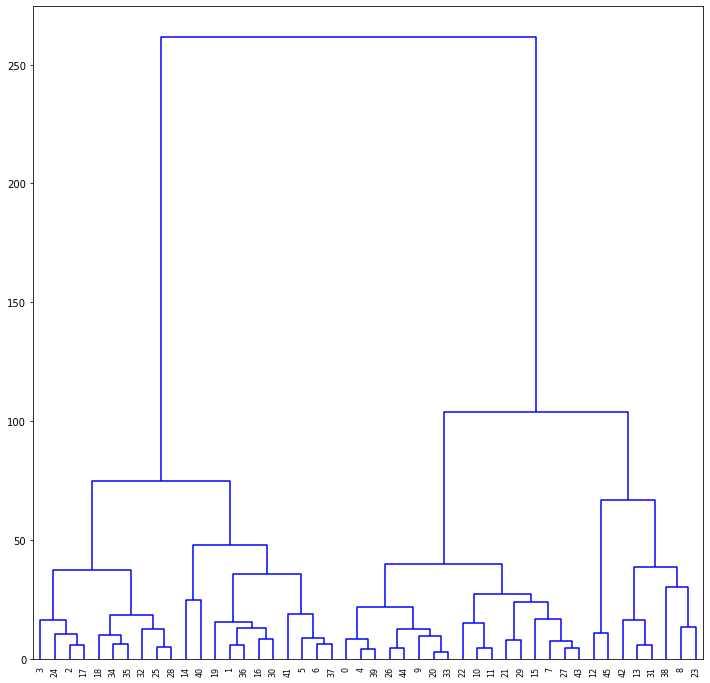

In [218]:
dn = dendrogram(link, color_threshold = 0)


По предварительной оценке у нас получилось четыре кластера. Построим каменистую осыпь.

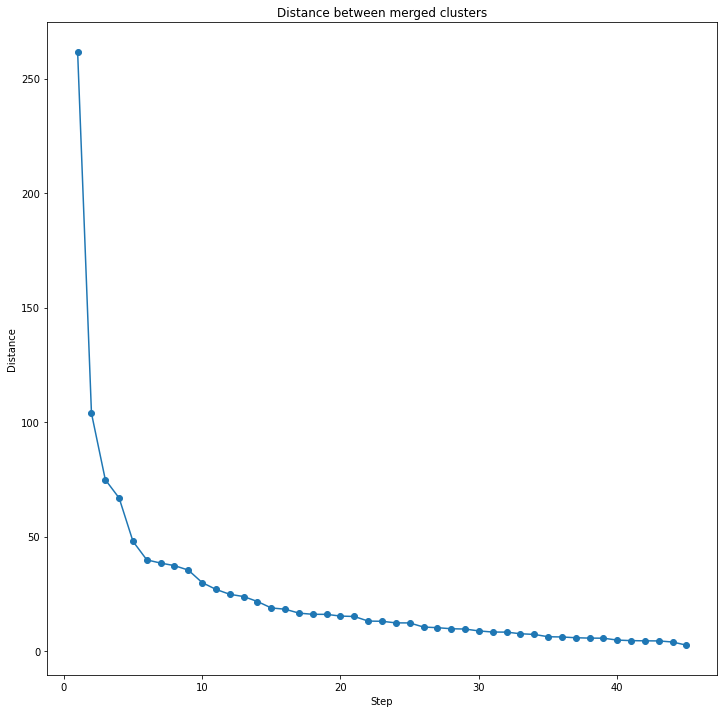

In [219]:
dist_rev = link[::-1, 2]
idxs = range(1, len(link) + 1)
plt.title('Distance between merged clusters')
plt.xlabel('Step')
plt.ylabel('Distance')
p = plt.plot(idxs, dist_rev, marker='o')

Из графика видно что луше останавливать объединение кластеров при расстоянии примерно равным 50, получая тем самым 5 кластеров.

Отразим полученные кластеры на дендрограмме.

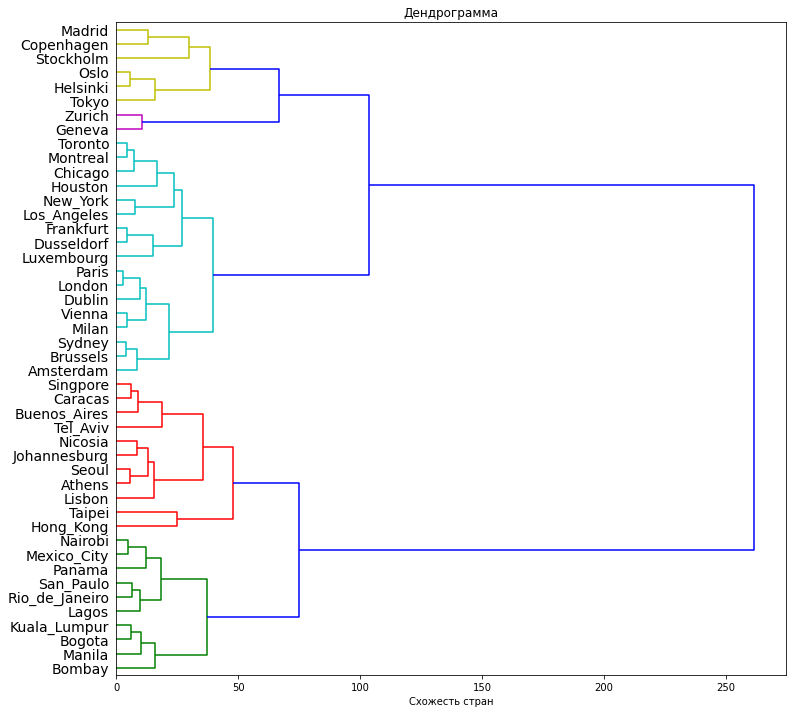

In [220]:
plt.xlabel('Схожесть стран')
plt.title('Дендрограмма')

dn = dendrogram(link, labels=X.index.tolist(),
                leaf_font_size = 14, 
                color_threshold=50,
                orientation = "right")

Добавим к нашей таблице данных столбец `cluster` в который запишем номер кластера, в который попал город.

In [271]:
X['cluster'] = fcluster(link, 5, criterion="maxclust")
X

,Work,Price,Salary,cluster
City,,,,
Amsterdam,91.755889,65.6,49.0,3
Athens,95.931478,53.8,30.4,2
Bogota,115.203426,37.9,11.5,1
Bombay,109.850107,30.3,5.3,1
Brussels,91.434690,73.8,50.5,3
Buenos_Aires,105.513919,56.1,12.5,2
Caracas,109.261242,61.0,10.9,2
Chicago,102.997859,73.9,61.9,3
Copenhagen,91.916488,91.3,62.9,5


Посмотрим на кластеры и их статистику.

In [272]:
for cluster in sorted(set(X["cluster"].tolist())):
    print(f"In cluster {cluster}:", X[X["cluster"] == cluster].index.values)

In cluster 1: ['Bogota' 'Bombay' 'Kuala_Lumpur' 'Lagos' 'Manila' 'Mexico_City' 'Nairobi'
 'Panama' 'Rio_de_Janeiro' 'San_Paulo']
In cluster 2: ['Athens' 'Buenos_Aires' 'Caracas' 'Hong_Kong' 'Johannesburg' 'Lisbon'
 'Nicosia' 'Seoul' 'Singpore' 'Taipei' 'Tel_Aviv']
In cluster 3: ['Amsterdam' 'Brussels' 'Chicago' 'Dublin' 'Dusseldorf' 'Frankfurt'
 'Houston' 'London' 'Los_Angeles' 'Luxembourg' 'Milan' 'Montreal'
 'New_York' 'Paris' 'Sydney' 'Toronto' 'Vienna']
In cluster 4: ['Geneva' 'Zurich']
In cluster 5: ['Copenhagen' 'Helsinki' 'Madrid' 'Oslo' 'Stockholm' 'Tokyo']


In [273]:
X[["Work", "Price", "Salary"]].describe()

,Work,Price,Salary
count,46.000000,46.000000,46.000000
mean,100.637743,70.100000,39.545652
std,9.333113,21.389177,24.757703
min,84.743041,30.300000,2.700000
25%,93.428801,51.775000,14.375000
50%,98.982869,70.950000,43.650000
75%,105.794968,81.900000,59.700000
max,127.141328,115.500000,100.000000


In [274]:
X.groupby("cluster").mean()

,Work,Price,Salary
cluster,,,
1,107.119914,43.610000,8.030000
2,105.776718,60.381818,23.909091
3,96.425872,75.758824,55.005882
4,100.321199,97.950000,95.150000
5,92.451820,106.750000,58.400000


In [275]:
X.groupby("cluster").size()

cluster
1    10
2    11
3    17
4     2
5     6
dtype: int64

## Вывод

Проведя иерархический кластерный анализ получили пять кластеров. Смотря на полученную статистику по кластерам можно заметить что все города работают почти одинаково и значение столбца с часами работы скорее всего не сильно влияло на кластеризацию.

Далее следует интерпретация самих кластеров.

Начнём с самого очевидного кластера, четвёртого. В нём мы получили два города: Женеву и Цюрих. В этих городах самые высокие зарплаты (примерно в два раза больше среднего по выборке). Так как все значения исходных данных были представлены относительно Цюриха, то и в этом кластере средние значения всех трёх критериев близки к 100%.

В первом кластере у нас находятся города с самым низким значением заработной платы (в среднем меньше в пять раз по сравнению со средним значение по всей выборке) и цен на продукты. В данный кластер вошли города южных стран, что логично сочетается с полученными результатами.

Во втором кластере у нас города в которых экономическая обстановка немного лучше первого кластера, но всё ещё низкая.

В третьем кластере у нас города со средним значением по всей выборке. Так же можно заметить что таких городов большинство.

В пятом кластере у нас находятся города в которых самая большая разница между ценой продуктов и зарплатой (в два раза).
